![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [53]:
# Re-run this cell
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("crimes.csv", dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


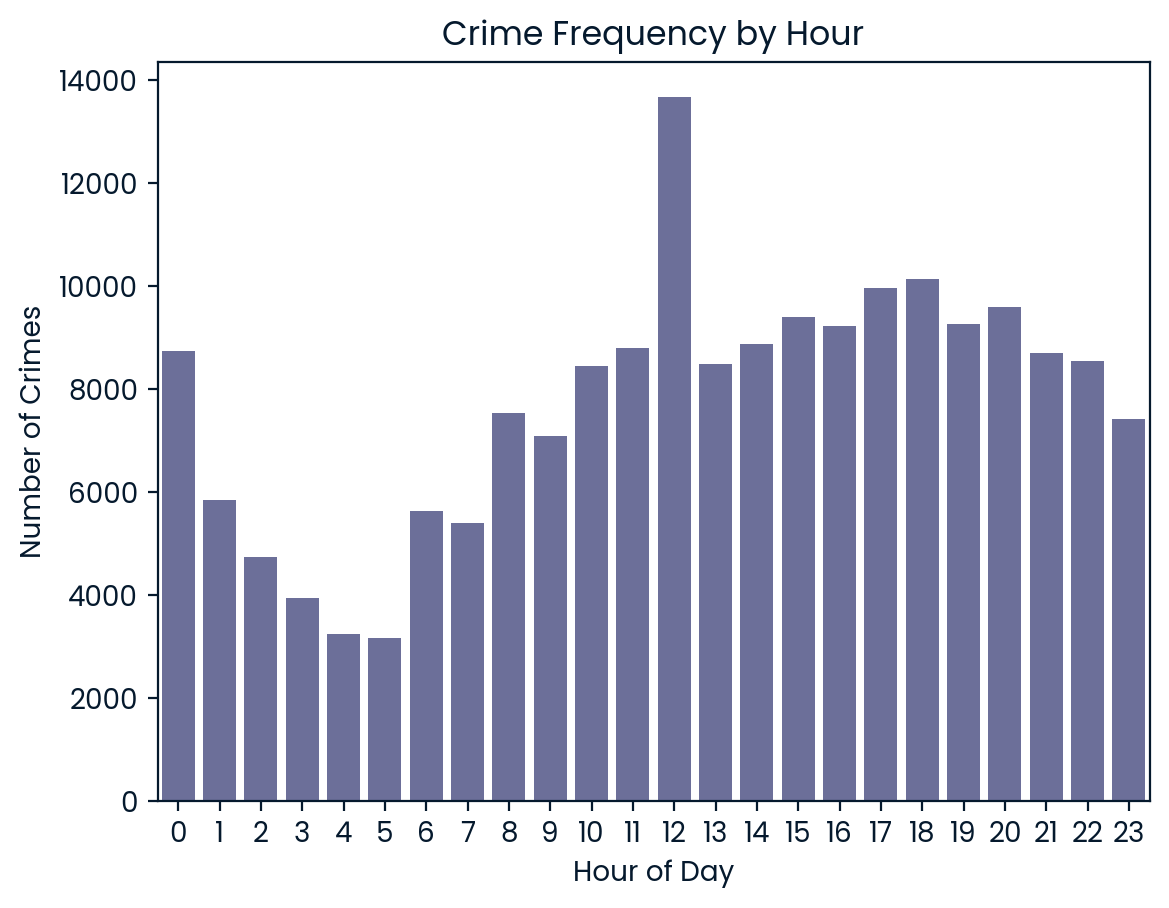

Hour with most crimes: 12


In [54]:
# Start coding here
# Extract hour from 'TIME OCC' and convert to integer
crimes["hour"] = crimes["TIME OCC"].str.zfill(4).str[:2].astype(int)

# Plot frequency of crimes by hour
hour_counts = crimes["hour"].value_counts().sort_index()
sns.barplot(x=hour_counts.index, y=hour_counts.values)
plt.xlabel("Hour of Day")
plt.ylabel("Number of Crimes")
plt.title("Crime Frequency by Hour")
plt.xticks(rotation=0)
plt.show()

# Store the hour with the highest frequency
peak_crime_hour = hour_counts.idxmax()
print("Hour with most crimes:", peak_crime_hour)


In [55]:
# Convert TIME OCC to hour
crimes["hour"] = crimes["TIME OCC"].str.zfill(4).str[:2].astype(int)

# Define night hours (10 PM to 3:59 AM)
night_hours = list(range(0, 4)) + [22, 23]

# Filter for night crimes
night_crimes = crimes[crimes["hour"].isin(night_hours)]

# Count crimes by area
night_crimes_by_area = night_crimes["AREA NAME"].value_counts()


In [56]:
# Define bins and labels
age_bins = [0, 17, 25, 34, 44, 54, 64, np.inf]
age_labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]

# Create age group column
crimes["age_group"] = pd.cut(crimes["Vict Age"], bins=age_bins, labels=age_labels, right=True)

# Count crimes by age group
victim_ages = crimes["age_group"].value_counts().sort_index()


can you do this Your code is not creating an object named peak_night_crime_location. Check if your code runs through and creates an object with this exact name.

In [57]:
# Find the location with the highest number of night crimes
peak_night_crime_location = night_crimes['LOCATION'].value_counts().idxmax()

# Display the result
peak_night_crime_location

'600 S  SPRING                       ST'

can you do this Did you correctly identify the location with the most crime between 10pm and 4am? After you've extracted the hour of the crime you can group by 'AREA NAME' and count the number of occurrences, sorting to get the largest frequency.

In [58]:
# Extract the hour from 'TIME OCC' if not already done
crimes['hour'] = crimes['TIME OCC'].str.zfill(4).str[:2].astype(int)

# Filter for crimes that occurred between 10pm (22) and 3:59am (3)
night_crimes = crimes[(crimes['hour'] >= 22) | (crimes['hour'] < 4)]

# Group by 'AREA NAME' and count occurrences
night_crimes_by_area = night_crimes.groupby('AREA NAME').size().sort_values(ascending=False)

# Identify the area with the most night crimes
peak_night_crime_location = night_crimes_by_area.idxmax()

# Display result
peak_night_crime_location


'Central'